
# <span style="color:rgb(213,80,0)">**Blazed Grating 1D**</span>

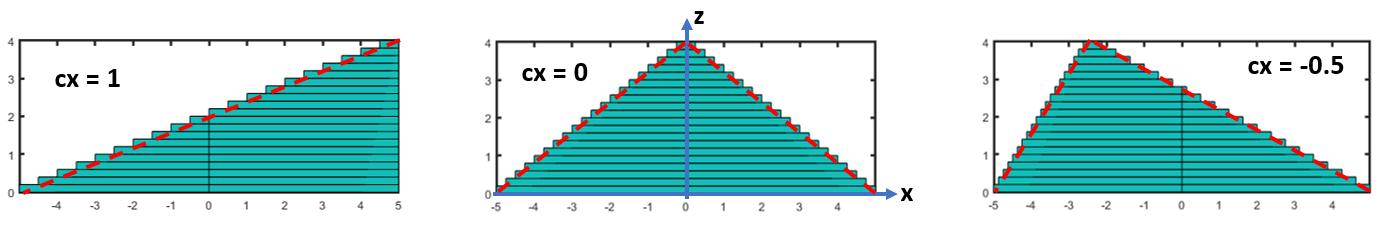

## Data & Geometry


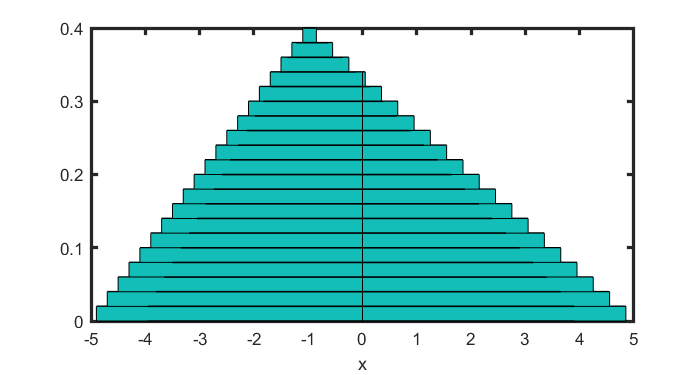

In [1]:
dx = 10;    % Period in x-axis (µm)
h = .4;     % Layer thickness
wx = dx;    % Width of the base
N = 20;     % Number of layers
Alpha = atan2(wx,h); % Flank angle
%
w = wx*(1-(2*(N:-1:1)-1)/(2*N)); % Width of different layers
%
cx = -0.2; % from -1 to 1 : x-translation cx*(dx-w)/2
%
[ab,Dep] = deal(cell(1,N));
for k = 1:N, ab{k} = [w(k)/2 inf]; Dep{k} = cx*[-w(k)/2+dx/2 0]; end
%if abs(w(end)-dx)<dx/1e8, Dep{N}(1) = 0; end
%
% without rounding (npx=npy=2)
geom = SetGeom('dx',dx,'mn',repmat({[4 20 20 20]},1,N),...
               'ab',ab,'hc',h/N*ones(1,N),'Dep',Dep);
%
Mesh = MeshLayer(geom);
%
figure('Position',[300  300  560  300])
VisuMesh(Mesh,1), view([0 0]), colorbar off, axis normal

## Spectrum Computation versus wavelength


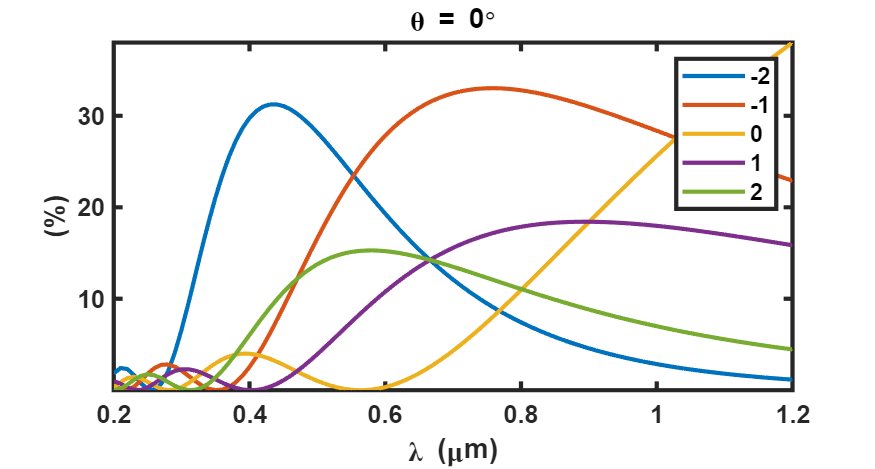

In [2]:
index = cell(1,N+2);
index{1} = 1;  [index{2:N+1}] = deal({2.41 1}); index{end} = 2.41;
%
% Incident Plane Wave
lambda = [linspace(.2,1.2,101)] ;    % Wavelength(µm)
theta = 0;%linspace(0,30,31)*pi/180; % Incident angle (rd)
inc = +1;   % inc = -1: from down, +1: from top
%
% Spectrum Computation versus incident angle and wavelength
Num = -2:2; % Order of diffraction
tic, [R_tm,T_tm,R_te,T_te] = Spectrum(index,geom,lambda,theta,inc,'mx',15,'Num',-2:2); t=toc;
%
% Plot Reflectivity versus wavelength in TM polarisation
figure('Position',[300  300  560  300]),
PlotCoefRTA(lambda,theta,T_tm(:,:)), axis tight
TextLegend = cell(1,length(Num)); for k=1:length(Num), TextLegend{k} = num2str(Num(k)); end
legend(TextLegend)